In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from time import time


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import tree

from sklearn import metrics
## Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

In [2]:
def apr(y_pred, y_real):
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)
    
    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1


##

def produce_confusion(positive_label, negative_label, cut_off, df, y_pred_name, y_real_name):
    
    #Set pred to 0 or 1 depending on whether it's higher than the cut_off point.
    
    if cut_off != 'binary':      
        df['pred_binary'] = np.where(df[y_pred_name] > cut_off , 1, 0)
    else: 
        df['pred_binary'] = df[y_pred_name]
    
    #Build the CM
    cm = confusion_matrix(df[y_real_name], df['pred_binary'])  
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g'); 

    # labels, title, ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('Real labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([negative_label, positive_label])
    ax.yaxis.set_ticklabels([negative_label, positive_label]);

    print('Test accuracy = ', accuracy_score(df[y_real_name], df['pred_binary']))

    return accuracy_score(df[y_real_name], df['pred_binary'])

In [3]:
df = pd.read_csv('1 - Project Data.csv')

In [4]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3540-RZJYU,1,United States,California,Zenia,95595,"40.170357, -123.417298",40.170357,-123.417298,Female,...,Yes,No,Month-to-month,No,Electronic check,86.20,1270.2,Yes,1,Lack of self-service on Website
1,5469-NUJUR,1,United States,California,Zenia,95595,"40.170357, -123.417298",40.170357,-123.417298,Male,...,No internet service,No internet service,Two year,Yes,Mailed check,19.95,373.5,No,0,NaN
2,1038-RQOST,1,United States,California,Zenia,95595,"40.170357, -123.417298",40.170357,-123.417298,Male,...,No internet service,No internet service,Month-to-month,No,Mailed check,20.60,414.95,No,0,NaN
3,6308-CQRBU,1,United States,California,Zenia,95595,"40.170357, -123.417298",40.170357,-123.417298,Female,...,Yes,Yes,Two year,No,Electronic check,109.25,7707.7,No,0,NaN
4,4360-PNRQB,1,United States,California,Yucca Valley,92284,"34.159534, -116.425984",34.159534,-116.425984,Male,...,No,No,Month-to-month,Yes,Bank transfer (automatic),75.60,1395.05,No,0,NaN


In [5]:
df['Zip Code'].nunique()

1652

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
df.describe(include='all')

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
count,7043,7043.0,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043,...,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043.000000,1869
unique,7043,NaN,1,1,1129,NaN,1652,NaN,NaN,2,...,3,3,3,2,4,NaN,6531,2,NaN,20
top,3540-RZJYU,NaN,United States,California,Los Angeles,NaN,"34.079934, -118.046695",NaN,NaN,Male,...,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No,NaN,Attitude of support person
freq,1,NaN,7043,7043,305,NaN,5,NaN,NaN,3555,...,2810,2785,3875,4171,2365,NaN,11,5174,NaN,192
mean,NaN,1.0,NaN,NaN,NaN,93521.964646,NaN,36.282441,-119.798880,NaN,...,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,0.265370,NaN
std,NaN,0.0,NaN,NaN,NaN,1865.794555,NaN,2.455723,2.157889,NaN,...,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,0.441561,NaN
min,NaN,1.0,NaN,NaN,NaN,90001.000000,NaN,32.555828,-124.301372,NaN,...,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,0.000000,NaN
25%,NaN,1.0,NaN,NaN,NaN,92102.000000,NaN,34.030915,-121.815412,NaN,...,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,0.000000,NaN
50%,NaN,1.0,NaN,NaN,NaN,93552.000000,NaN,36.391777,-119.730885,NaN,...,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,0.000000,NaN
75%,NaN,1.0,NaN,NaN,NaN,95351.000000,NaN,38.224869,-118.043237,NaN,...,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,1.000000,NaN


In [8]:
df.drop(columns=['Count', 'State', 'Country', 'CustomerID'], inplace = True)

In [9]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce').fillna(0)

In [10]:
df['Total Charges'] = df['Total Charges'].astype(float)

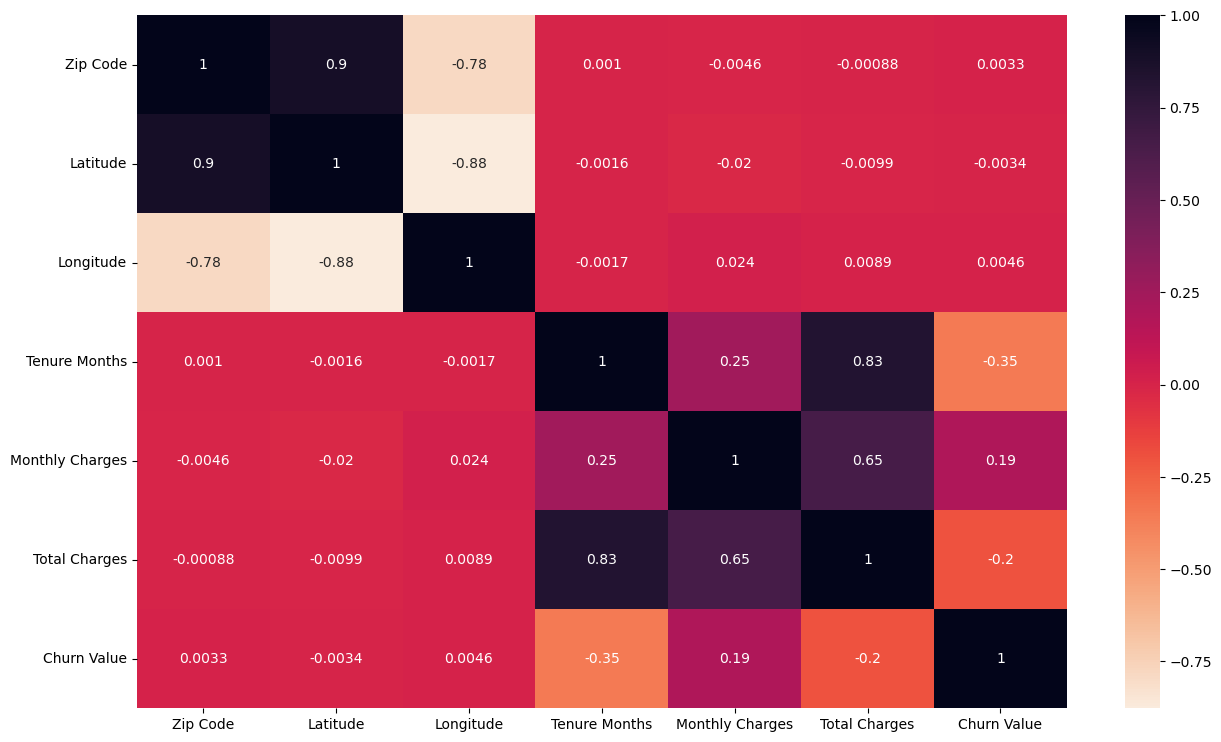

In [11]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='rocket_r')
plt.show()

In [12]:
def speed_clean(df):
    df['Gender'] = df.Gender.map({'Female':0, 'Male':1})
    df['Senior Citizen'] = df['Senior Citizen'].map({'No':0, 'Yes':1})
    df['Partner'] = df.Partner.map({'No':0, 'Yes':1})
    df['Dependents'] = df.Dependents.map({'No':0, 'Yes':1})
    df['Phone Service'] = df['Phone Service'].map({'No':0, 'Yes':1})
    df['Streaming TV'] = df['Streaming TV'].map({'No':0, 'Yes':1})
    df['Paperless Billing'] = df['Paperless Billing'].map({'No':0, 'Yes':1})
    
    df = pd.get_dummies(df, columns=['Internet Service'], prefix='Internet Service', drop_first=True)
    df = pd.get_dummies(df, columns=['Contract'], prefix='Contract', drop_first=True)
    df = pd.get_dummies(df, columns=['Payment Method'], prefix='Payment Method', drop_first=True)

    return df

In [13]:
dffe=speed_clean(df)

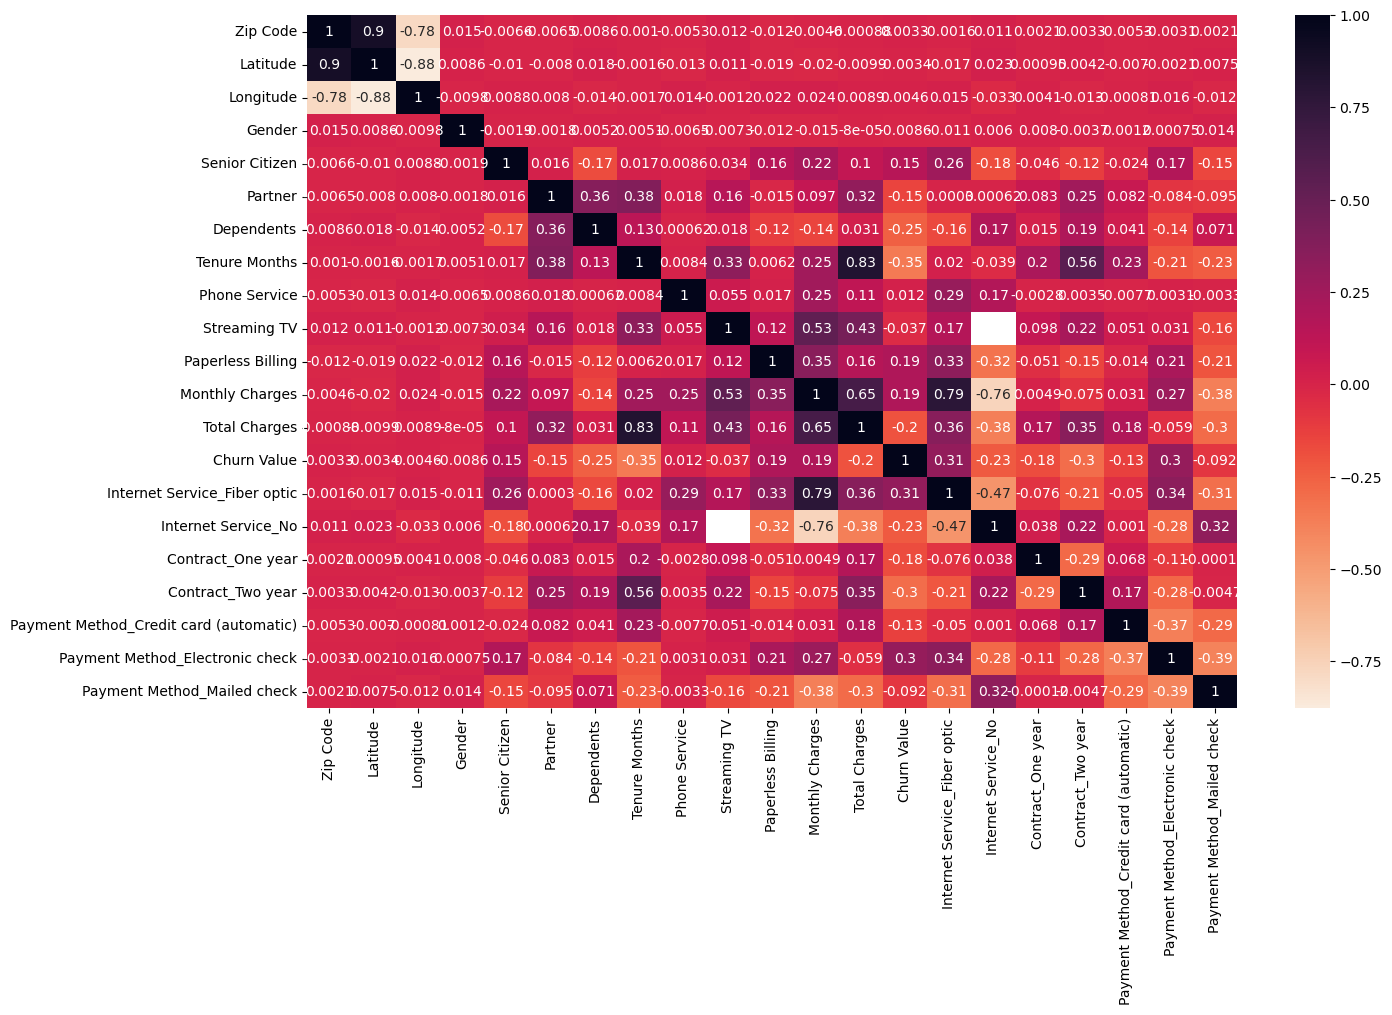

In [14]:
plt.figure(figsize=(15,9))
sns.heatmap(dffe.corr(numeric_only=True), annot=True, cmap='rocket_r')
plt.show()

C:\Users\Kalo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


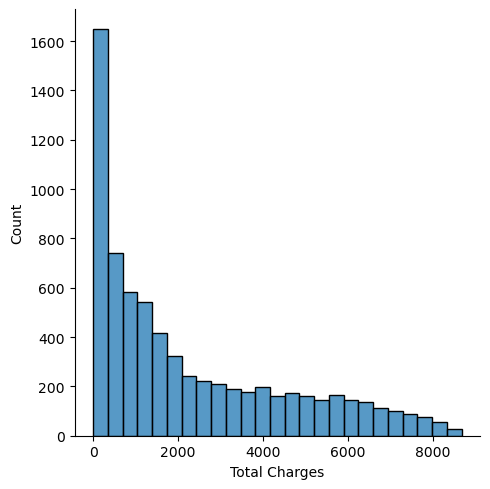

In [15]:
sns.displot(dffe['Total Charges'])
plt.show()

C:\Users\Kalo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


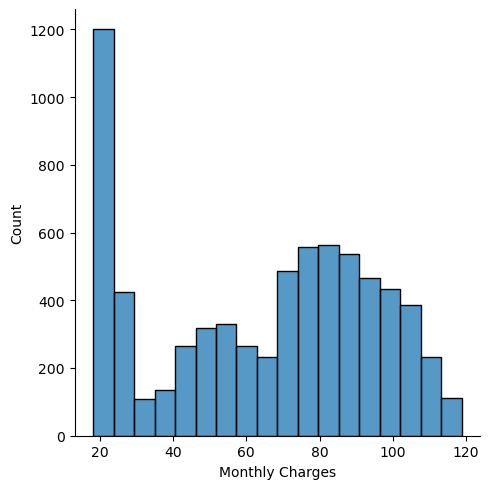

In [16]:
sns.displot(dffe['Monthly Charges'])
plt.show()

In [17]:
dffe

,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Churn Label,Churn Value,Churn Reason,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,Zenia,95595,"40.170357, -123.417298",40.170357,-123.417298,0,0,0,0,15,...,Yes,1,Lack of self-service on Website,True,False,False,False,False,True,False
1,Zenia,95595,"40.170357, -123.417298",40.170357,-123.417298,1,0,0,0,19,...,No,0,NaN,False,True,False,True,False,False,True
2,Zenia,95595,"40.170357, -123.417298",40.170357,-123.417298,1,0,1,1,19,...,No,0,NaN,False,True,False,False,False,False,True
3,Zenia,95595,"40.170357, -123.417298",40.170357,-123.417298,0,0,1,0,71,...,No,0,NaN,True,False,False,True,False,True,False
4,Yucca Valley,92284,"34.159534, -116.425984",34.159534,-116.425984,1,0,0,0,18,...,No,0,NaN,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Acton,93510,"34.501452, -118.207862",34.501452,-118.207862,1,1,1,0,29,...,No,0,NaN,True,False,False,False,False,True,False
7039,Acampo,95220,"38.200231, -121.235034",38.200231,-121.235034,1,0,1,0,13,...,Yes,1,Attitude of service provider,True,False,False,False,False,False,True
7040,Acampo,95220,"38.200231, -121.235034",38.200231,-121.235034,1,0,1,0,10,...,Yes,1,Lack of self-service on Website,True,False,False,False,False,True,False
7041,Acampo,95220,"38.200231, -121.235034",38.200231,-121.235034,0,0,0,0,52,...,Yes,1,Competitor offered more data,True,False,True,False,True,False,False


In [18]:
phone_users = dffe[(dffe['Phone Service'] == 1) & (dffe['Internet Service_No'] == 1)]
phone_users

,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Churn Label,Churn Value,Churn Reason,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
1,Zenia,95595,"40.170357, -123.417298",40.170357,-123.417298,1,0,0,0,19,...,No,0,NaN,False,True,False,True,False,False,True
2,Zenia,95595,"40.170357, -123.417298",40.170357,-123.417298,1,0,1,1,19,...,No,0,NaN,False,True,False,False,False,False,True
16,Yuba City,95991,"39.02741, -121.614982",39.027410,-121.614982,0,0,1,1,15,...,No,0,NaN,False,True,False,False,False,False,True
25,Yountville,94599,"38.421458, -122.365048",38.421458,-122.365048,1,1,1,0,23,...,No,0,NaN,False,True,True,False,False,True,False
35,Yorkville,95494,"38.888351, -123.239647",38.888351,-123.239647,0,0,1,1,26,...,No,0,NaN,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019,Aguanga,92536,"33.482243, -116.827173",33.482243,-116.827173,0,0,0,1,24,...,No,0,NaN,False,True,False,True,False,False,True
7023,Agoura Hills,91301,"34.129058, -118.759788",34.129058,-118.759788,0,0,0,0,13,...,No,0,NaN,False,True,True,False,False,True,False
7028,Adin,96006,"41.171578, -120.913161",41.171578,-120.913161,0,0,0,0,46,...,No,0,NaN,False,True,False,True,False,True,False
7030,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,0,0,1,0,61,...,Yes,1,Don't know,False,True,False,False,False,False,True


In [19]:
internet_users = dffe[(dffe['Phone Service'] == 0) & (dffe['Internet Service_No'] == 0)]
internet_users

,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Churn Label,Churn Value,Churn Reason,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
8,Yucca Valley,92284,"34.159534, -116.425984",34.159534,-116.425984,0,0,0,0,12,...,No,0,NaN,False,False,True,False,False,True,False
17,Yuba City,95993,"39.075694, -121.70606",39.075694,-121.706060,1,0,1,1,66,...,No,0,NaN,False,False,False,True,False,False,False
19,Yuba City,95991,"39.02741, -121.614982",39.027410,-121.614982,1,0,1,0,17,...,No,0,NaN,False,False,True,False,False,True,False
20,Yuba City,95993,"39.075694, -121.70606",39.075694,-121.706060,0,0,0,1,26,...,No,0,NaN,False,False,False,False,False,False,True
23,Yreka,96097,"41.764869, -122.671316",41.764869,-122.671316,0,0,1,1,22,...,No,0,NaN,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,Alameda,94502,"37.724817, -122.224363",37.724817,-122.224363,0,0,0,1,13,...,No,0,NaN,False,False,False,False,False,True,False
7024,Agoura Hills,91301,"34.129058, -118.759788",34.129058,-118.759788,0,0,0,0,3,...,No,0,NaN,False,False,False,False,False,False,True
7025,Agoura Hills,91301,"34.129058, -118.759788",34.129058,-118.759788,0,1,1,0,3,...,No,0,NaN,False,False,False,False,False,True,False
7026,Adin,96006,"41.171578, -120.913161",41.171578,-120.913161,0,1,1,0,43,...,Yes,1,Competitor offered higher download speeds,False,False,False,False,True,False,False


In [20]:
use_both = dffe[(dffe['Phone Service'] == 1) & (dffe['Internet Service_No'] == 0)]
use_both

,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Churn Label,Churn Value,Churn Reason,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,Zenia,95595,"40.170357, -123.417298",40.170357,-123.417298,0,0,0,0,15,...,Yes,1,Lack of self-service on Website,True,False,False,False,False,True,False
3,Zenia,95595,"40.170357, -123.417298",40.170357,-123.417298,0,0,1,0,71,...,No,0,NaN,True,False,False,True,False,True,False
4,Yucca Valley,92284,"34.159534, -116.425984",34.159534,-116.425984,1,0,0,0,18,...,No,0,NaN,True,False,False,False,False,False,False
5,Yucca Valley,92284,"34.159534, -116.425984",34.159534,-116.425984,1,1,1,0,72,...,No,0,NaN,False,False,False,True,True,False,False
6,Yucca Valley,92284,"34.159534, -116.425984",34.159534,-116.425984,0,0,1,1,23,...,No,0,NaN,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Acton,93510,"34.501452, -118.207862",34.501452,-118.207862,1,1,1,0,29,...,No,0,NaN,True,False,False,False,False,True,False
7039,Acampo,95220,"38.200231, -121.235034",38.200231,-121.235034,1,0,1,0,13,...,Yes,1,Attitude of service provider,True,False,False,False,False,False,True
7040,Acampo,95220,"38.200231, -121.235034",38.200231,-121.235034,1,0,1,0,10,...,Yes,1,Lack of self-service on Website,True,False,False,False,False,True,False
7041,Acampo,95220,"38.200231, -121.235034",38.200231,-121.235034,0,0,0,0,52,...,Yes,1,Competitor offered more data,True,False,True,False,True,False,False


In [21]:
phone_users.shape[0]

1526

In [22]:
internet_users.shape[0]

682

In [23]:
use_both.shape[0]

4835

In [24]:
Features = dffe.columns
Features

Index(['City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Reason', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Contract_One year', 'Contract_Two year',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

In [25]:
columns_to_remove = ['City', 'Zip Code', 'Lat Long','Latitude','Longitude', 'Multiple Lines','Online Security','Online Backup',
                    'Device Protection','Tech Support','Streaming TV','Streaming Movies','Churn Label','Churn Value',
                    'Churn Reason']

In [26]:
df_model = dffe.drop(columns = columns_to_remove)
df_model

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,0,0,0,15,1,0,86.20,1270.20,True,False,False,False,False,True,False
1,1,0,0,0,19,1,1,19.95,373.50,False,True,False,True,False,False,True
2,1,0,1,1,19,1,0,20.60,414.95,False,True,False,False,False,False,True
3,0,0,1,0,71,1,0,109.25,7707.70,True,False,False,True,False,True,False
4,1,0,0,0,18,1,1,75.60,1395.05,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,0,29,1,1,79.30,2414.55,True,False,False,False,False,True,False
7039,1,0,1,0,13,1,1,96.65,1162.85,True,False,False,False,False,False,True
7040,1,0,1,0,10,1,1,98.50,1037.75,True,False,False,False,False,True,False
7041,0,0,0,0,52,1,1,111.25,5916.45,True,False,True,False,True,False,False


In [27]:
y = dffe['Churn Value'].copy()

In [28]:
lr = LogisticRegression(max_iter=300, random_state=10)

In [29]:
lr.fit(df_model, y)

LogisticRegression(max_iter=300, random_state=10)

In [30]:
lr.predict_proba(df_model)

array([[0.51628837, 0.48371163],
       [0.92299662, 0.07700338],
       [0.9697874 , 0.0302126 ],
       ...,
       [0.23909381, 0.76090619],
       [0.81710952, 0.18289048],
       [0.95605549, 0.04394451]])

In [31]:
df_model[['prob_stay', 'prob_churn']] = lr.predict_proba(df_model)

In [32]:
df_model['y_pred'] = np.where(df_model['prob_churn']>.5, 1, 0)

In [33]:
df_model.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_stay,prob_churn,y_pred
0,0,0,0,0,15,1,0,86.20,1270.20,True,False,False,False,False,True,False,0.516288,0.483712,0
1,1,0,0,0,19,1,1,19.95,373.50,False,True,False,True,False,False,True,0.922997,0.077003,0
2,1,0,1,1,19,1,0,20.60,414.95,False,True,False,False,False,False,True,0.969787,0.030213,0
3,0,0,1,0,71,1,0,109.25,7707.70,True,False,False,True,False,True,False,0.909899,0.090101,0
4,1,0,0,0,18,1,1,75.60,1395.05,True,False,False,False,False,False,False,0.457077,0.542923,1


In [34]:
print(metrics.confusion_matrix(y, df_model['y_pred']))

[[4651  523]
 [ 860 1009]]


In [35]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [36]:
get_results(y, df_model['y_pred'])

The confusion matrix for your predictions is:
[[4651  523]
 [ 860 1009]] 

The accuracy of your model is: 0.8036348147096408
The recall of your model is: 0.5398608881754949
The precision of your model is: 0.6586161879895561
The F1-score of your model is: 0.5933548956189356


In [37]:
print(metrics.classification_report(y, df_model['y_pred']))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5174
           1       0.66      0.54      0.59      1869

    accuracy                           0.80      7043
   macro avg       0.75      0.72      0.73      7043
weighted avg       0.79      0.80      0.80      7043



In [38]:
phone_users['Churn Value'].sum()

113

In [39]:
phone_users[(phone_users['Multiple Lines'] == 1)]['Churn Value'].sum()

0

In [40]:
df['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Long distance charges                         44
Lack of affordable download/upload speed      44
Limited range of services                     44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [41]:
df[df['Churn Value'] == True]['City'].value_counts()

City
Los Angeles      90
San Diego        50
San Francisco    31
San Jose         29
Sacramento       26
                 ..
Mill Valley       1
Millbrae          1
Milpitas          1
Mira Loma         1
Los Altos         1
Name: count, Length: 833, dtype: int64

In [42]:
phone_users_churn_counts = phone_users['Churn Value'].value_counts()

TypeError: xticks(): Parameter 'labels' can't be set without setting 'ticks'

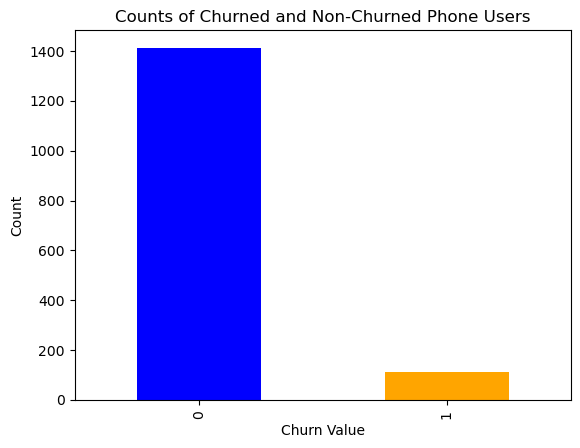

In [43]:
phone_users_churn_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Counts of Churned and Non-Churned Phone Users')
plt.xlabel('Churn Value')
plt.ylabel('Count')
plt.xticks(rotation=0, labels=['Not Churned', 'Churned'])
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist([phone_users['Churn Value'], internet_users['Churn Value'], use_both['Churn Value']],
         bins=[0, 1, 2],
         color=['blue', 'green', 'orange'],
         label=['Phone Users', 'Internet Users', 'Phone+Internet Users'])


In [ ]:
plt.figure(figsize=(10, 6))
churn_counts = [phone_users['Churn Value'].sum(), internet_users['Churn Value'].sum(), use_both['Churn Value'].sum()]
for i, count in enumerate(churn_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', color='red', fontweight='bold')

In [54]:
df.describe



<bound method NDFrame.describe of               City  Zip Code                Lat Long   Latitude   Longitude  \
0            Zenia     95595  40.170357, -123.417298  40.170357 -123.417298   
1            Zenia     95595  40.170357, -123.417298  40.170357 -123.417298   
2            Zenia     95595  40.170357, -123.417298  40.170357 -123.417298   
3            Zenia     95595  40.170357, -123.417298  40.170357 -123.417298   
4     Yucca Valley     92284  34.159534, -116.425984  34.159534 -116.425984   
...            ...       ...                     ...        ...         ...   
7038         Acton     93510  34.501452, -118.207862  34.501452 -118.207862   
7039        Acampo     95220  38.200231, -121.235034  38.200231 -121.235034   
7040        Acampo     95220  38.200231, -121.235034  38.200231 -121.235034   
7041        Acampo     95220  38.200231, -121.235034  38.200231 -121.235034   
7042        Acampo     95220  38.200231, -121.235034  38.200231 -121.235034   

      Gender  Sen

In [47]:
df['Total Internet Users'] = df['Internet Service'].apply(lambda x: 1 if x != 'No' else 0)

In [48]:
df['Total Security Users'] = df['Online Security'].apply(lambda x: 1 if x == 'Yes' else 0)


In [49]:
df['Total TV Streaming Users'] = df['Streaming TV'].apply(lambda x: 1 if x == 'Yes' else 0)


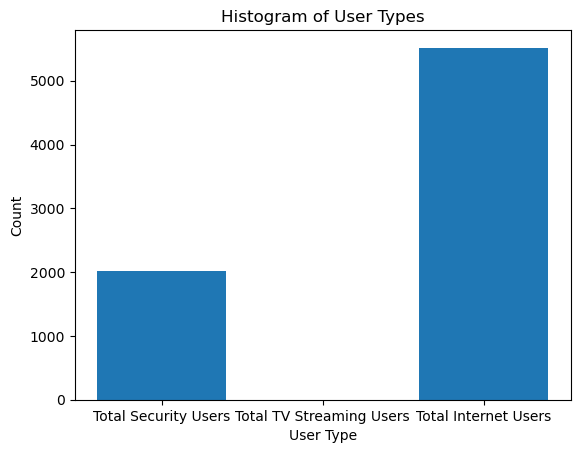

In [50]:
plt.bar(df.columns[-3:], df[df.columns[-3:]].sum())
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Histogram of User Types')
plt.show()